In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl

In [2]:
#### Primero filtramos las columnas que no tienen peso. Ya sea porque son

In [3]:
def imprimir_proporciones_none(dataframe):
    aux=0
    for i in range(0, len(datos.columns)):
        print("Columna: " + datos.columns[i])
        aux = datos[datos.columns[i]].value_counts()
        if "None" in aux.index:
            print("Hay " + aux["None"].astype(str) + " None")
            print("El porcentaje de None es: " + (aux["None"]*100/aux.sum()).astype(str) + "%")
        else:
            print("No hay None")
        print("")

def filtrar_columnas_nulas(dataframe):
    aux = 0
    ret_list = []
    for i in range(0, len(dataframe.columns)):
        aux = datos[dataframe.columns[i]].value_counts()
        if "None" in aux.index:
            if aux["None"]==len(dataframe):
                print(dataframe.columns[i])
                continue
        ret_list.append(dataframe.columns[i])
    return ret_list

def columnas_invariantes(dataframe):
    for i in range(0,len(dataframe.columns)):
        if (len(dataframe[dataframe.columns[i]].value_counts())==1):
            print("La columna " + dataframe.columns[i] + " tiene un solo dato")
            print("")

In [4]:
datos_csv = pd.read_csv("Entrenamieto_ECI_2020.csv")
datos = datos_csv.replace({"NaT":"None", "nan":"None", "NaN":"None"})

datos = datos[filtrar_columnas_nulas(datos)]
datos["Price"] = pd.to_numeric(datos["Price"], errors="coerce")
datos["Quote_Expiry_Date"] = pd.to_numeric(datos["Price"], errors="coerce")
datos["Last_Modified_Date"] = pd.to_numeric(datos["Price"], errors="coerce")
#datos["Actual_Delivery_Date"] = pd.to_numeric(datos["Actual_Delivery_Date"], errors="coerce")

imprimir_proporciones_none(datos)    
columnas_invariantes(datos)

Last_Activity
Actual_Delivery_Date
Columna: ID
No hay None

Columna: Region
No hay None

Columna: Territory
Hay 4999 None
El porcentaje de None es: 29.497846226470763%

Columna: Pricing, Delivery_Terms_Quote_Appr
No hay None

Columna: Pricing, Delivery_Terms_Approved
No hay None

Columna: Bureaucratic_Code_0_Approval
No hay None

Columna: Bureaucratic_Code_0_Approved
No hay None

Columna: Submitted_for_Approval
No hay None

Columna: Bureaucratic_Code
No hay None

Columna: Account_Created_Date
No hay None

Columna: Source
Hay 9497 None
El porcentaje de None es: 56.039417005959756%

Columna: Billing_Country
Hay 27 None
El porcentaje de None es: 0.15932023366967604%

Columna: Account_Name
No hay None

Columna: Opportunity_Name
No hay None

Columna: Opportunity_ID
No hay None

Columna: Sales_Contract_No
Hay 6973 None
El porcentaje de None es: 41.145925532542634%

Columna: Account_Owner
No hay None

Columna: Opportunity_Owner
No hay None

Columna: Account_Type
Hay 112 None
El porcentaje de 

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

### En este notebook vamos a analizar geografia.

In [6]:
datos['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

[Text(0.5, 0, 'Region'), Text(0, 0.5, 'Apariciones')]

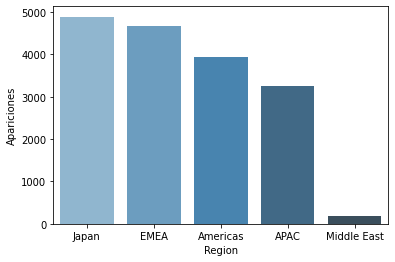

In [7]:
regiones = datos['Region'].value_counts()

ax = sns.barplot(x=regiones.index, y=regiones.values,
                 palette="Blues_d")
ax.set(xlabel='Region', ylabel='Apariciones')

#ax = sns.countplot(x="Region", data=datos)

[Text(0, 0, 'None'),
 Text(1, 0, 'Germany'),
 Text(2, 0, 'NW America'),
 Text(3, 0, 'Australia'),
 Text(4, 0, 'India'),
 Text(5, 0, 'NE America'),
 Text(6, 0, 'Japan'),
 Text(7, 0, 'Netherlands'),
 Text(8, 0, 'SE America'),
 Text(9, 0, 'France'),
 Text(10, 0, 'Singapore'),
 Text(11, 0, 'United Kingdom'),
 Text(12, 0, 'Belgium'),
 Text(13, 0, 'Italy'),
 Text(14, 0, 'Spain')]

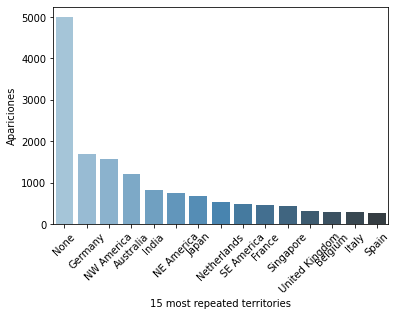

In [8]:
territorios = datos['Territory'].value_counts().head(15)

ax = sns.barplot(x=territorios.index, y=territorios.values,
                 palette="Blues_d")
ax.set(xlabel='15 most repeated territories', ylabel='Apariciones')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [9]:
#### En este ultimo grafico tenemos algo interesante, gran parte de los territorios son NONE.

In [10]:
territorios

None              4999
Germany           1682
NW America        1568
Australia         1208
India              809
NE America         760
Japan              681
Netherlands        533
SE America         493
France             449
Singapore          441
United Kingdom     313
Belgium            285
Italy              283
Spain              268
Name: Territory, dtype: int64

In [11]:
territorios['None']

4999

In [12]:
territorios.sum

<bound method Series.sum of None              4999
Germany           1682
NW America        1568
Australia         1208
India              809
NE America         760
Japan              681
Netherlands        533
SE America         493
France             449
Singapore          441
United Kingdom     313
Belgium            285
Italy              283
Spain              268
Name: Territory, dtype: int64>

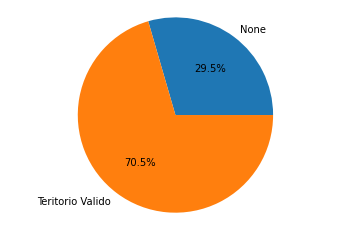

In [13]:
labels = ['None', 'Teritorio Valido']
territorios = datos['Territory'].value_counts()

sizes = [datos['Territory'].value_counts()['None'],
        len(datos['Territory']) - datos['Territory'].value_counts()['None'] ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

### Stage Segun Region.

In [14]:
region = datos[ ['Region', 'Stage'] ]

In [15]:
region.pivot_table(index = 'Region', columns = 'Stage', aggfunc='size')

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,1355.0,1896.0,NaN,8.0,3.0
Americas,2140.0,1793.0,8.0,4.0,NaN
EMEA,2189.0,2471.0,1.0,3.0,NaN
Japan,1546.0,3323.0,1.0,14.0,8.0
Middle East,120.0,50.0,8.0,6.0,NaN


### Para veitar demoivre (analizado en otros notebooks), se procede a eliminar los casos que no son Closed Lost ni Closed Won.

In [16]:
region = datos[ ['Region', 'Stage'] ]
filtro =  ['Closed Lost','Closed Won' ]
region = region [region['Stage'].isin(filtro) ]
tabla = region.pivot_table(index = 'Region', columns = 'Stage', aggfunc='size')
tabla['Total'] = tabla['Closed Lost'] + tabla ['Closed Won']
tabla = tabla.sort_values("Total", ascending=False)
tabla = tabla.reset_index() 
tabla

Stage,Region,Closed Lost,Closed Won,Total
0,Japan,1546,3323,4869
1,EMEA,2189,2471,4660
2,Americas,2140,1793,3933
3,APAC,1355,1896,3251
4,Middle East,120,50,170


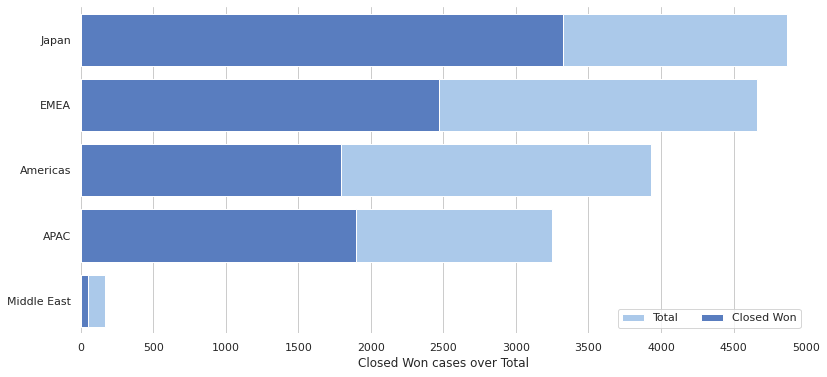

In [17]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 6))

# Load the example car crash dataset
aPlotear = tabla 

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Region", data=aPlotear,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Closed Won", y="Region", data=aPlotear,
            label="Closed Won", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Closed Won cases over Total")
ax.set_xticks(np.arange(0, 5001, 500))
sns.despine(left=True, bottom=True)

### Relacion de Closed Won over cases en los 10 territorios mas populares.

In [18]:
top10 = datos['Territory'].value_counts().head(10).index
datos_filtrado = datos[ datos['Territory'].isin(top10) ]
datos_filtrado = datos_filtrado [ ['Territory','Stage' ] ]
filtro = [ 'Closed Lost', 'Closed Won']
tabla = datos_filtrado.pivot_table(index = 'Territory', columns = 'Stage', aggfunc='size')
tabla['Total'] = tabla['Closed Lost'] + tabla ['Closed Won']
tabla = tabla.sort_values("Total", ascending=False)
tabla = tabla.reset_index() 
tabla

Stage,Territory,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Total
0,None,1947.0,3034.0,1.0,10.0,7.0,4981.0
1,Germany,659.0,1023.0,NaN,NaN,NaN,1682.0
2,NW America,587.0,973.0,8.0,NaN,NaN,1560.0
3,Australia,506.0,696.0,NaN,4.0,2.0,1202.0
4,India,433.0,374.0,NaN,1.0,1.0,807.0
5,NE America,501.0,259.0,NaN,NaN,NaN,760.0
6,Japan,130.0,546.0,NaN,4.0,1.0,676.0
7,Netherlands,275.0,257.0,1.0,NaN,NaN,532.0
8,SE America,302.0,187.0,NaN,4.0,NaN,489.0
9,France,306.0,143.0,NaN,NaN,NaN,449.0


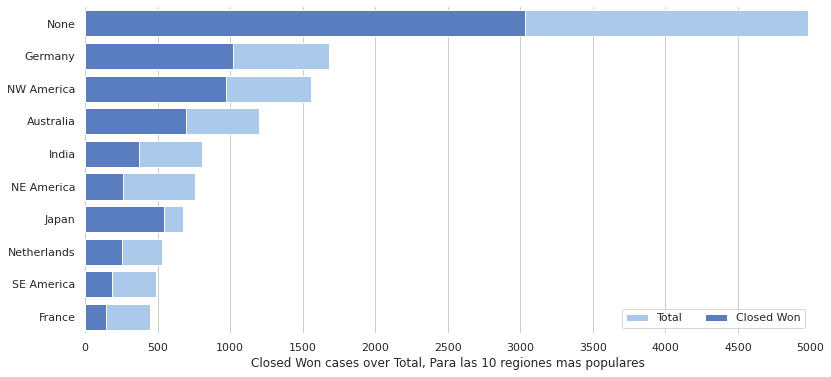

In [19]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 6))

# Load the example car crash dataset
aPlotear = tabla 

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Territory", data=aPlotear,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Closed Won", y="Territory", data=aPlotear,
            label="Closed Won", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="Closed Won cases over Total, Para las 10 regiones mas populares")
ax.set_xticks(np.arange(0, 5001, 500))
sns.despine(left=True, bottom=True)

### Ahora quiero las regiones con mayor ratio de aprobacion.

In [20]:
datos['Aprobado'] = (datos['Stage'] == "Closed Won")

In [21]:
datos.sample(3)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Aprobado
11192,7135,EMEA,Poland,0,0,0,0,0,Bureaucratic_Code_4,7/26/2017,...,Q1,2018,0,EUR,91350.0,EUR,91350.0,Closed Lost,Prod_Category_A_None,False
4301,19124,APAC,Australia,1,1,1,1,0,Bureaucratic_Code_4,2/10/2014,...,Q2,2017,28,USD,9521453.5,USD,23803629.5,Closed Lost,Prod_Category_A_None,False
4889,14163,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q4,2016,0,EUR,21580.0,EUR,112930.0,Closed Won,Prod_Category_A_None,True


In [22]:
grouped = datos[ ['Region', 'Aprobado'] ].groupby("Region").mean()
grouped

,Aprobado
Region,
APAC,0.581239
Americas,0.454499
EMEA,0.529803
Japan,0.679272
Middle East,0.271739


In [23]:
grouped.iloc[0].values[0]

0.5812385039852851

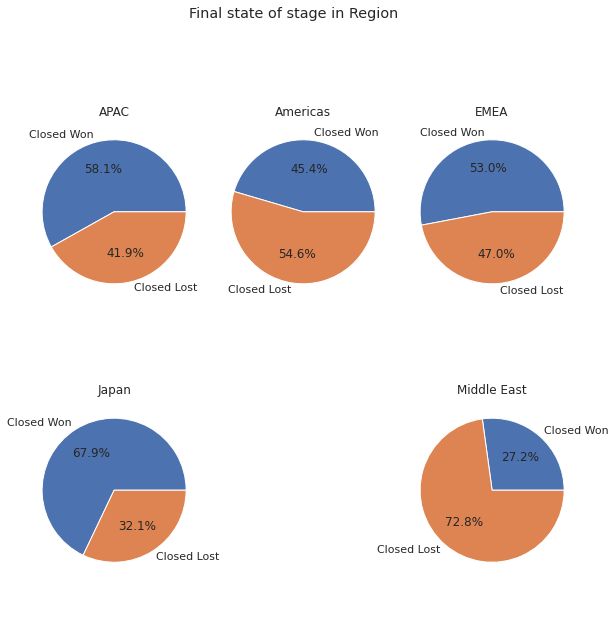

In [27]:
fig, axs = plt.subplots(2,3,figsize=(10,10))
plt.subplots_adjust(hspace = 0.8)

labels = ['Closed Won', 'Closed Lost']

sizes = [grouped.iloc[0].values[0],
        1 - grouped.iloc[0].values[0] ]
    
axs[0][0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][0].set_title(grouped.index[0])

sizes = [grouped.iloc[1].values[0],
        1 - grouped.iloc[1].values[0] ]
    
axs[0][1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][1].set_title(grouped.index[1])


sizes = [grouped.iloc[2].values[0],
        1 - grouped.iloc[2].values[0] ]
    
axs[0][2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[0][2].set_title(grouped.index[2])


sizes = [grouped.iloc[3].values[0],
        1 - grouped.iloc[3].values[0] ]
    
axs[1][0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[1][0].set_title(grouped.index[3])


sizes = [grouped.iloc[4].values[0],
        1 - grouped.iloc[4].values[0] ]
    
axs[1][2].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
#axs[i].axis('equal')
axs[1][2].set_title(grouped.index[4])

axs[1][1].axis('off')

fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle("Final state of stage in Region" )


plt.show()
